[![Typing SVG](https://readme-typing-svg.demolab.com?font=Roboto+Slab&weight=500&size=23&duration=5001&pause=1000&center=true&vCenter=true&random=false&width=440&lines=Sentiment+Analysis+on+Movie+Reviews)](https://git.io/typing-svg)

In [1]:
# importing necessary libraries

import opendatasets as od
import pandas as pd

### Data acquisition

I am using the freely available dataset of movie reviews from the Kaggle site. I have already download the API key .json file from Kaggle which has username and key information which is being used below to download the dataset.

In [2]:
od.download("https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data?select=IMDB+Dataset.csvhttps://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data?select=IMDB+Dataset.csv")

Skipping, found downloaded files in ".\imdb-dataset-of-50k-movie-reviews" (use force=True to force download)


### Basic EDA

In [3]:
# Reading the data file and loading into a DataFrame for further evaluation
df = pd.read_csv("./imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [4]:
# Getting data statistics
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [5]:
# Handling missing values
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
# Sentiment distribution analysis
print(df.groupby('sentiment').size())

sentiment
negative    25000
positive    25000
dtype: int64


In [7]:
# Glimpse of reviews
df.sample(10).values

array([["Any movie that portrays the hard-working responsible husband as the person who has to change because of bored, cheating wife is an obvious result of 8 years of the Clinton era.<br /><br />It's little wonder that this movie was written by a woman.",
        'negative'],
       ["Having not seen the previous two in the trilogy of Bourne movies, I was a little reluctant to watch The Bourne Ultimatum.<br /><br />However it was a very thrilling experience and I didn't have the problem of not understanding what was happening due to not seeing the first two films. Each part of the story was easy to understand and I fell in love with The Bourne Ultimatum before it had reached the interval! I don't think I have ever watched such an exquisitely made, and gripping film, especially an action film. Since I usually shy away from action and thriller type movies, this was such great news to me. Ultimatum is one of the most enthralling films, it grabs your attention from the first second till 

### Data Processing and Cleaning

In [8]:
# importing necessary libraries

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split

import re
import string

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
def preprocess_text(text):

    # Removing tags
    html_tags_pattern = re.compile(r'<.*?>')
    cleaned_text = re.sub(html_tags_pattern, '', text)
    
    # A simple way to handle negation: attach "not_" to words following a negation word
    negation_re = re.compile(r"\b(not|no|never|cannot|none|neither|nor|nobody|nowhere|nothing|hardly|barely)\b[\s]+([a-z]+)", re.IGNORECASE)
    final_text = negation_re.sub(lambda match: f"{match.group(1)}_{match.group(2)}", cleaned_text)

    # tokenization using NLTK's word tokenize
    tokens = word_tokenize(final_text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Removing punctuation (leaving the case as is because it could give sentiment nuances)
    tokens = [word for word in tokens if word.isalpha()]
    
    # Stemming (reducing words to base form which will help in grouping together words with similar meaning) using NLTK's PorterStemmer
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    
    return " ".join(tokens)

# Applying tokenization and cleaning to each review
df['processed_review'] = df['review'].apply(preprocess_text)

# TF-IDF representation using Scikit-learn
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['processed_review'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

In [19]:
# Using the Multinomial Naive Bayes (MNB) classifier for sentiment analysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions, output_dict=True)

# Print the results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8558

Confusion Matrix:
[[4231  730]
 [ 712 4327]]

Classification Report:
{'negative': {'precision': 0.855957920291321, 'recall': 0.8528522475307397, 'f1-score': 0.8544022617124394, 'support': 4961}, 'positive': {'precision': 0.8556456397073363, 'recall': 0.8587021234371899, 'f1-score': 0.8571711568938192, 'support': 5039}, 'accuracy': 0.8558, 'macro avg': {'precision': 0.8558017799993287, 'recall': 0.8557771854839649, 'f1-score': 0.8557867093031293, 'support': 10000}, 'weighted avg': {'precision': 0.8558005621050512, 'recall': 0.8558, 'f1-score': 0.8557975079943366, 'support': 10000}}


### Results Visualization

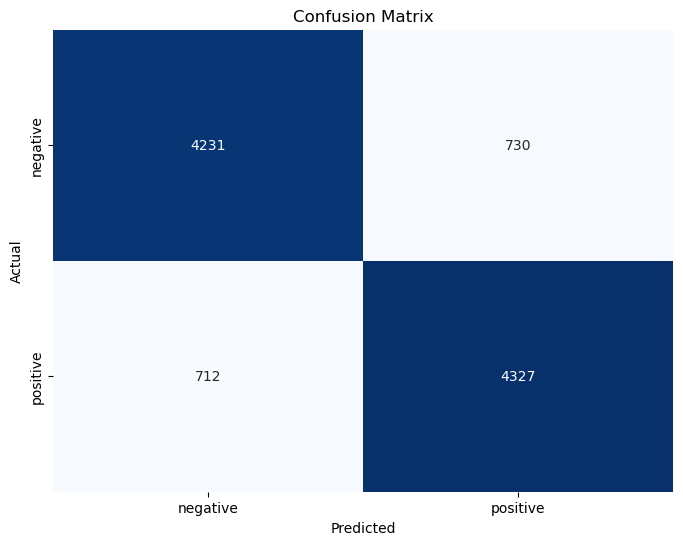

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


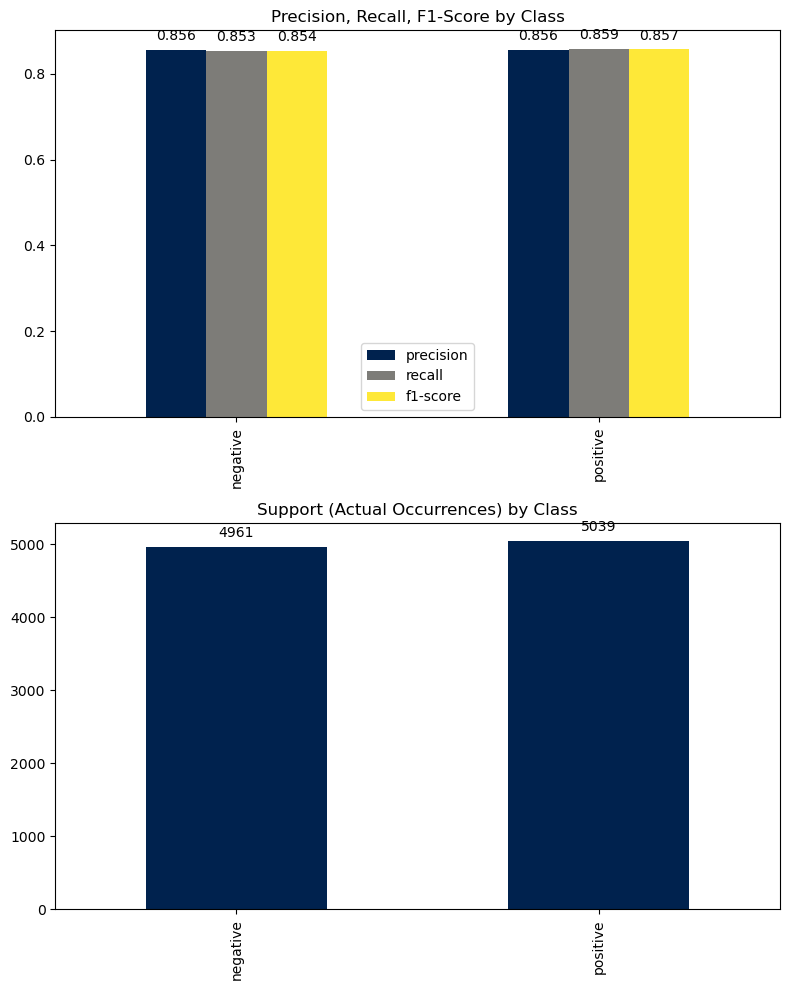

In [21]:
# Convert the classification report to a DataFrame
metrics_df = pd.DataFrame(columns=['precision', 'recall', 'f1-score', 'support'])
for class_label, metrics in classification_rep.items():
    if class_label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    metrics_df = pd.concat([metrics_df, pd.DataFrame(metrics, index=[class_label])])


# Plotting Precision, Recall, F1-score
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax = metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='cividis', ax=axes[0])
ax.set_title('Precision, Recall, F1-Score by Class')

# Adding column labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plotting Support separately
ax = metrics_df['support'].plot(kind='bar', colormap='cividis', ax=axes[1])
ax.set_title('Support (Actual Occurrences) by Class')

# Adding column labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


This project involves sentiment analysis on a dataset of 50,000 movie reviews from IMDB. After acquiring the data, basic exploratory data analysis (EDA) was performed, including statistics, handling missing values, and analyzing sentiment distribution. The data was then preprocessed by cleaning, tokenizing, removing stop words, and applying TF-IDF representation. A Multinomial Naive Bayes classifier was trained on the processed data to predict sentiment (positive/negative). The model achieved an accuracy of approximately 86%. The results were visualized using a heatmap for the confusion matrix. This project demonstrates a comprehensive approach to sentiment analysis, covering data acquisition, EDA, text preprocessing, model training, evaluation, and visualization. The code utilizes Python, pandas, scikit-learn, NLTK, and seaborn for efficient analysis and visualization.